In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Dataset = pd.read_csv(r"C:\Users\niraj\OneDrive\Desktop\DA projects\Electronic Product Sales Analysis AMAZON\electronics.csv")

In [3]:
Dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [4]:
Dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [5]:
Dataset.shape
#hs 1292954 rows and 10 columns

(1292954, 10)

In [6]:
Dataset.info()
#shows null count and dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [7]:
#From above we req # 1. User ID - int64

# 2. Product ID - object

# 3. Rating - int64

# 4. Timestamp - int64

# 5. Category - object

# 6. Brand - object

#now we know timestamp needs to be converted from int to datetime datatype
from datetime import datetime
pd.to_datetime(Dataset["timestamp"])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [9]:
#We also need to convert ProuctID,Brand and Category from onject to string data type
Dataset["brand"] = Dataset["brand"].astype(str)

Dataset['timestamp'] = pd.to_datetime(Dataset['timestamp'])

In [10]:
Dataset["category"] = Dataset["category"].astype(str)

In [11]:
Dataset["item_id"] = Dataset["item_id"].astype(str)

In [12]:
#Also need to convert rating from int to float
Dataset["rating"] = Dataset["rating"].astype(float)

In [13]:
Dataset["user_id"] = Dataset["user_id"].astype(str)


In [14]:
Dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


In [15]:
#Mean that is overall rating is 4.1, max rating is 5, min is 5
#standard deviation is 1.4 : A standard deviation (or σ) is a measure of how dispersed the data is in relation to the mean.
#Low standard deviation meansdata are clustered around the mean, and high standard deviation indicates data are more spread out.


In [16]:
Dataset.nunique()
#unique users,items , brands etc

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [17]:
Dataset.corr()

,rating,year,split
rating,1.000000,-0.008103,0.026575
year,-0.008103,1.000000,0.044871
split,0.026575,0.044871,1.000000


In [18]:
Dataset.duplicated().sum()

0

In [19]:
Dataset.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand               0
year                0
user_attr     1118830
split               0
dtype: int64

In [20]:
Dataset['rating'].value_counts()
#most rating are 5

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

In [22]:
Dataset['year'] = pd.DatetimeIndex(Dataset['timestamp']).year
Dataset['year'].value_counts()
#Hence,2015 had best year of sales

2015    320887
2016    302619
2017    192477
2014    180676
2013     99855
2018     80229
2012     38389
2011     23894
2010     16888
2009     12804
2008      9428
2007      6798
2006      2614
2005      2170
2004      1275
2003       833
2002       481
2001       403
2000       187
1999        47
Name: year, dtype: int64

In [24]:
Dataset['month'] = pd.DatetimeIndex(Dataset['timestamp']).month
Dataset['month'].value_counts()
#January was best month for sales for all year

1     140773
12    124597
3     116464
2     110546
8     109835
7     107612
4      99136
5      98207
9      97368
11     97015
6      96317
10     95084
Name: month, dtype: int64

In [26]:
Dataset.dropna(inplace = True)
Dataset.isnull().sum()


item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     0
split         0
month         0
dtype: int64

In [27]:
#VISUALIZATIONs

<AxesSubplot:xlabel='rating', ylabel='count'>

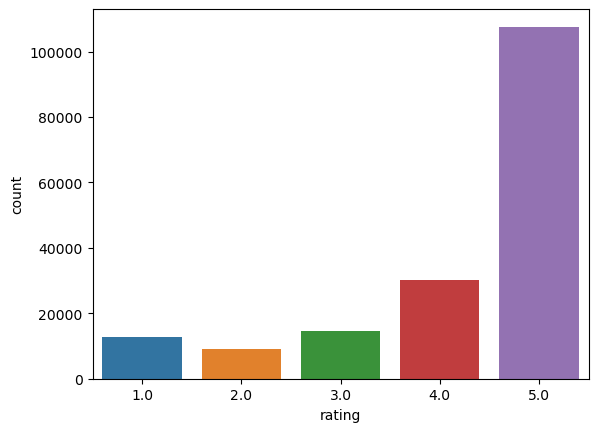

In [28]:
sns.countplot(x = "rating",data = Dataset)

<AxesSubplot:xlabel='year', ylabel='count'>

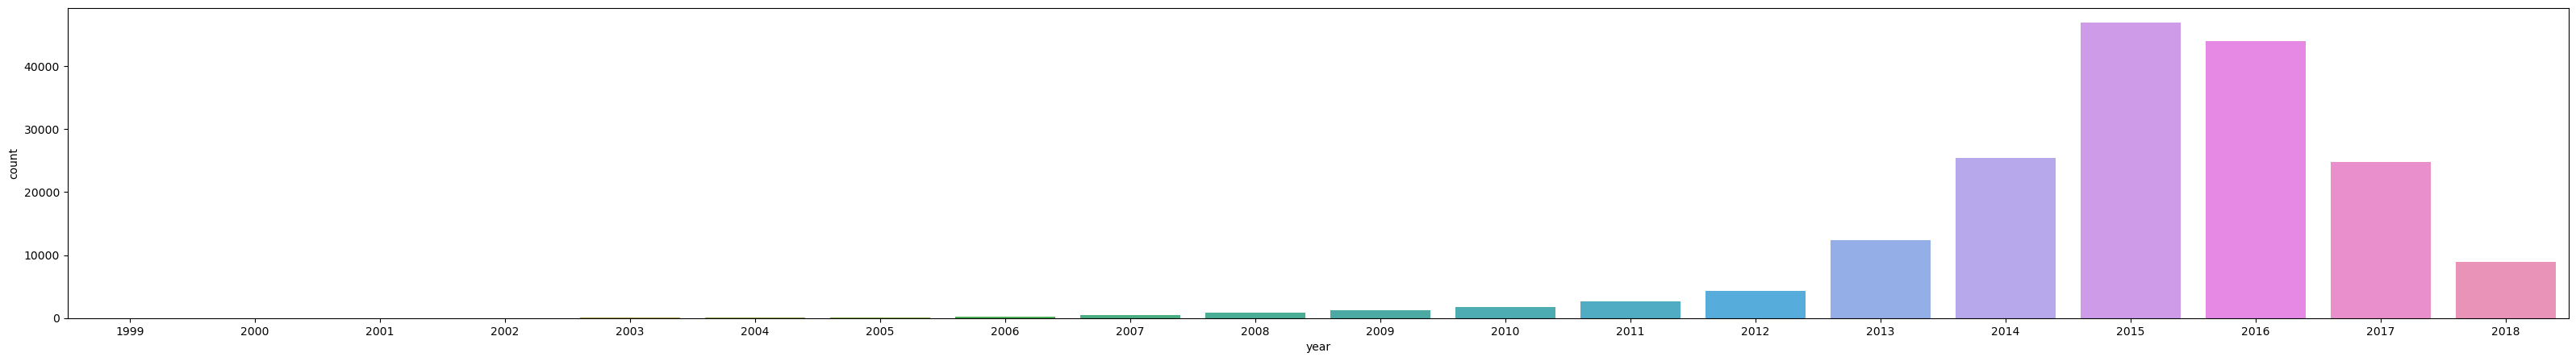

In [35]:
fig, ax = plt.subplots(figsize=(40, 5))
sns.countplot(x = 'year',data = Dataset)
#2015 was best year of sales

<AxesSubplot:xlabel='month', ylabel='count'>

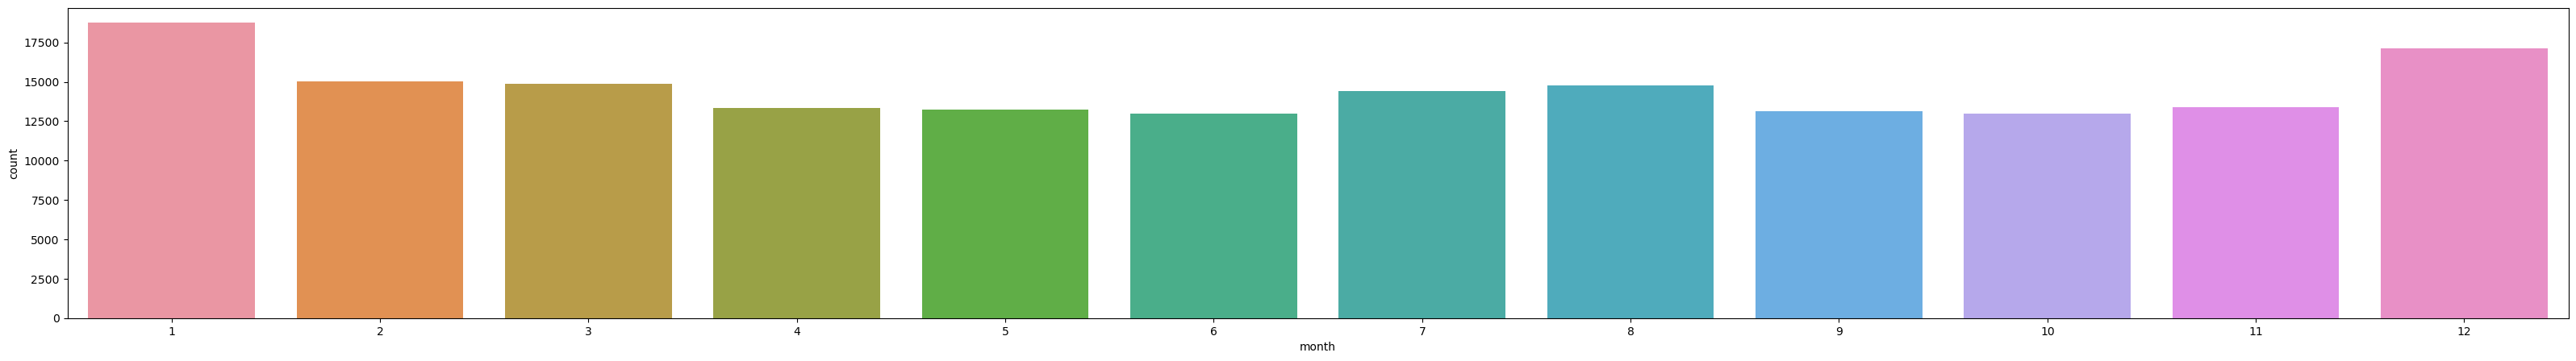

<AxesSubplot:xlabel='brand', ylabel='count'>

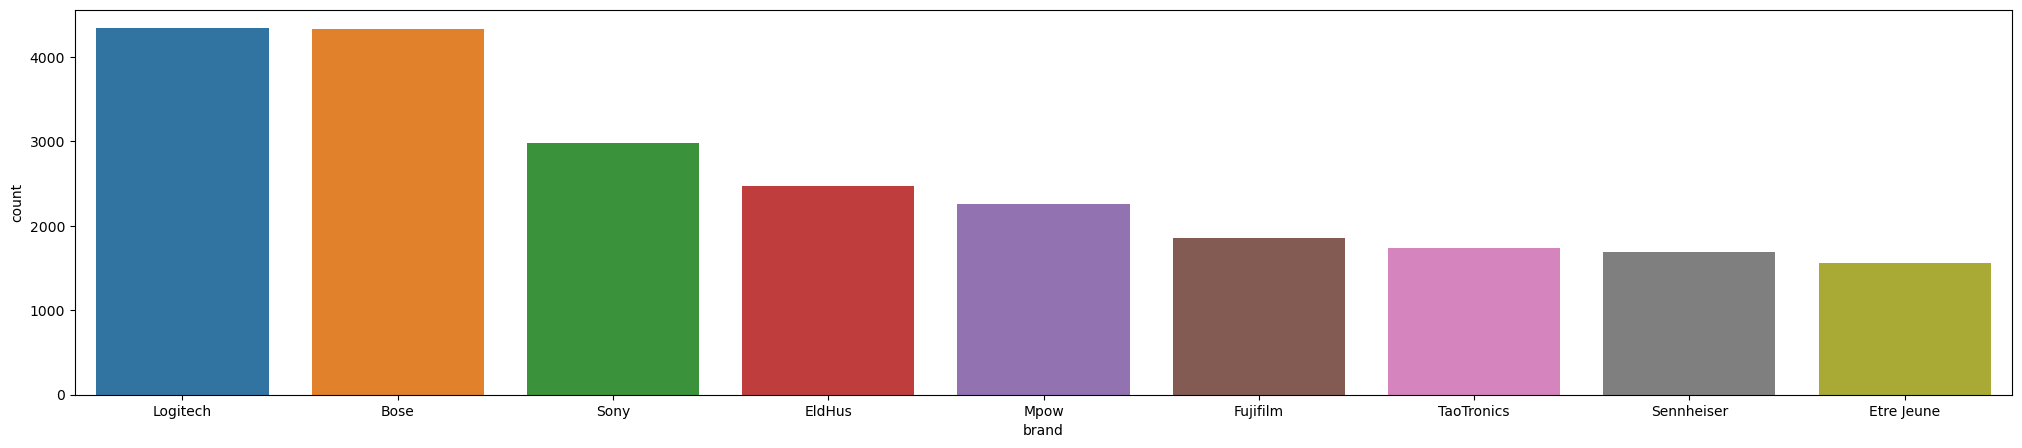

In [44]:
#Brands with most sales
fig, ax = plt.subplots(figsize=(25, 5))
sns.countplot(x = "brand",data = Dataset, order = Dataset["brand"].value_counts().iloc[1:10].index)

<AxesSubplot:xlabel='brand', ylabel='count'>

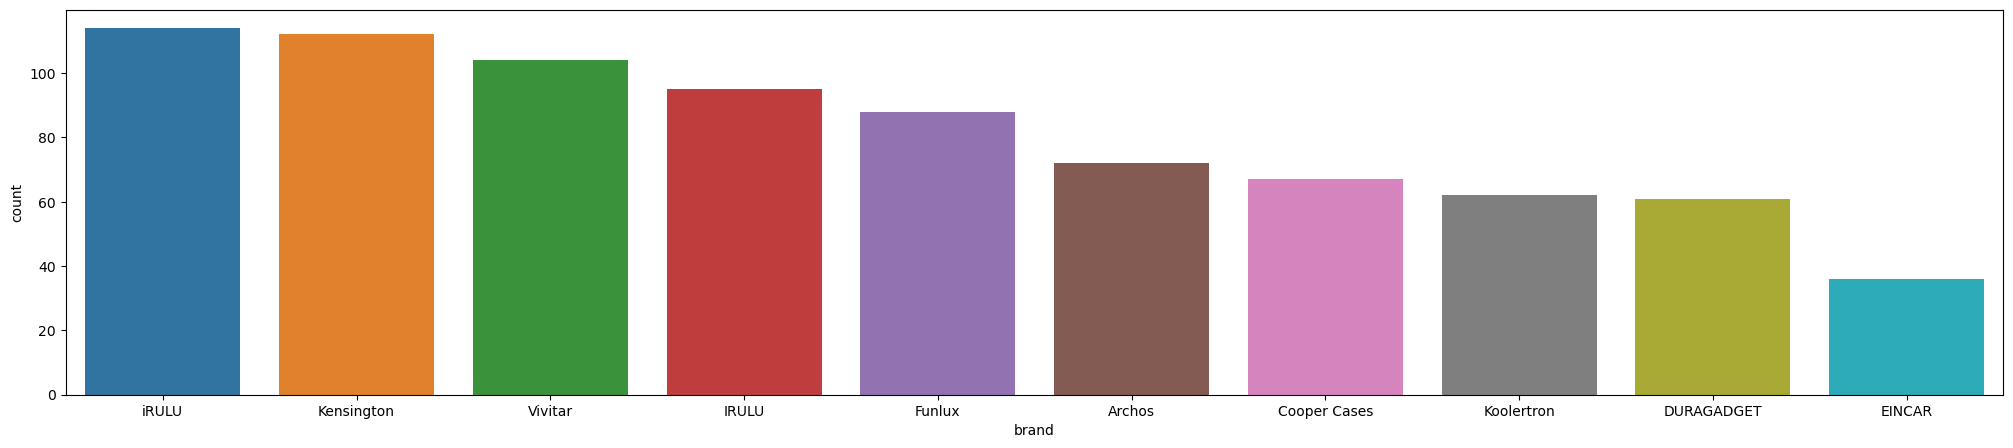

In [45]:
#brands with least sales
fig, ax = plt.subplots(figsize=(25, 5))
sns.countplot(x = "brand",data = Dataset, order = Dataset["brand"].value_counts().iloc[-10:].index)

<AxesSubplot:xlabel='brand', ylabel='count'>

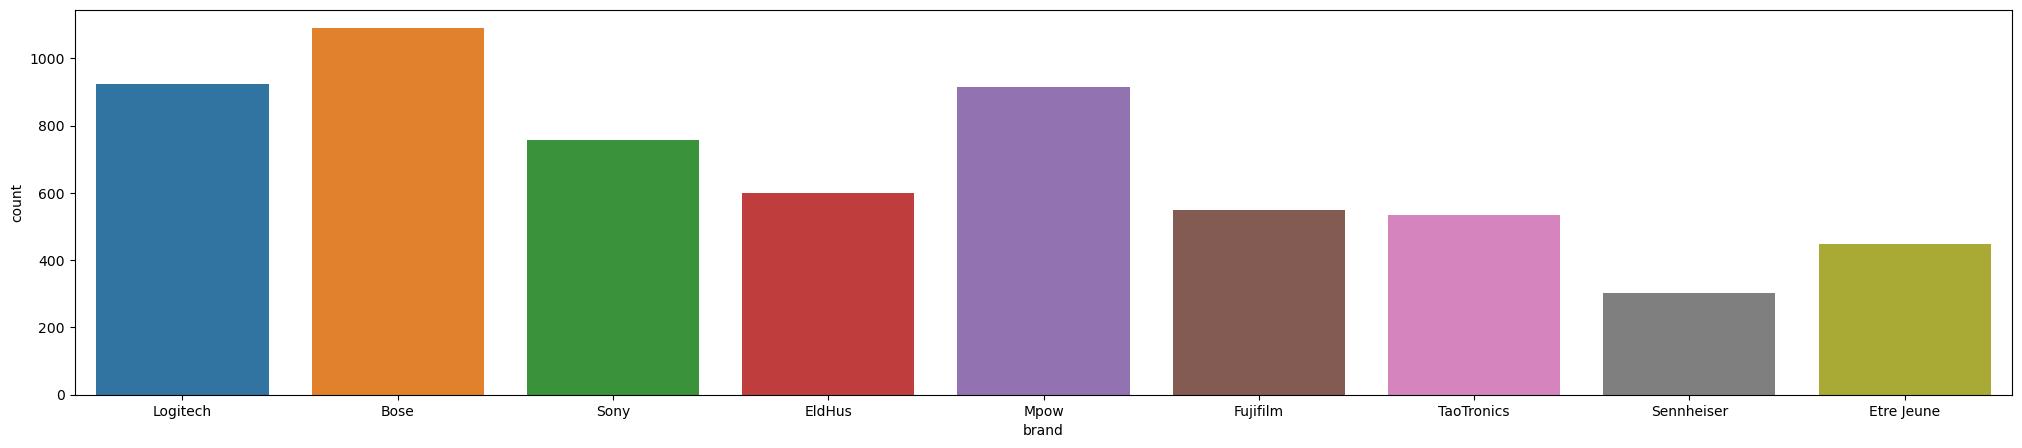

In [51]:
#brands with most sales in 2016
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x = 'brand',data = Dataset[Dataset['year']==2015],order = Dataset['brand'].value_counts().iloc[1:10].index)
#Bose had most sales followed by logitech and mpow

<AxesSubplot:xlabel='brand', ylabel='count'>

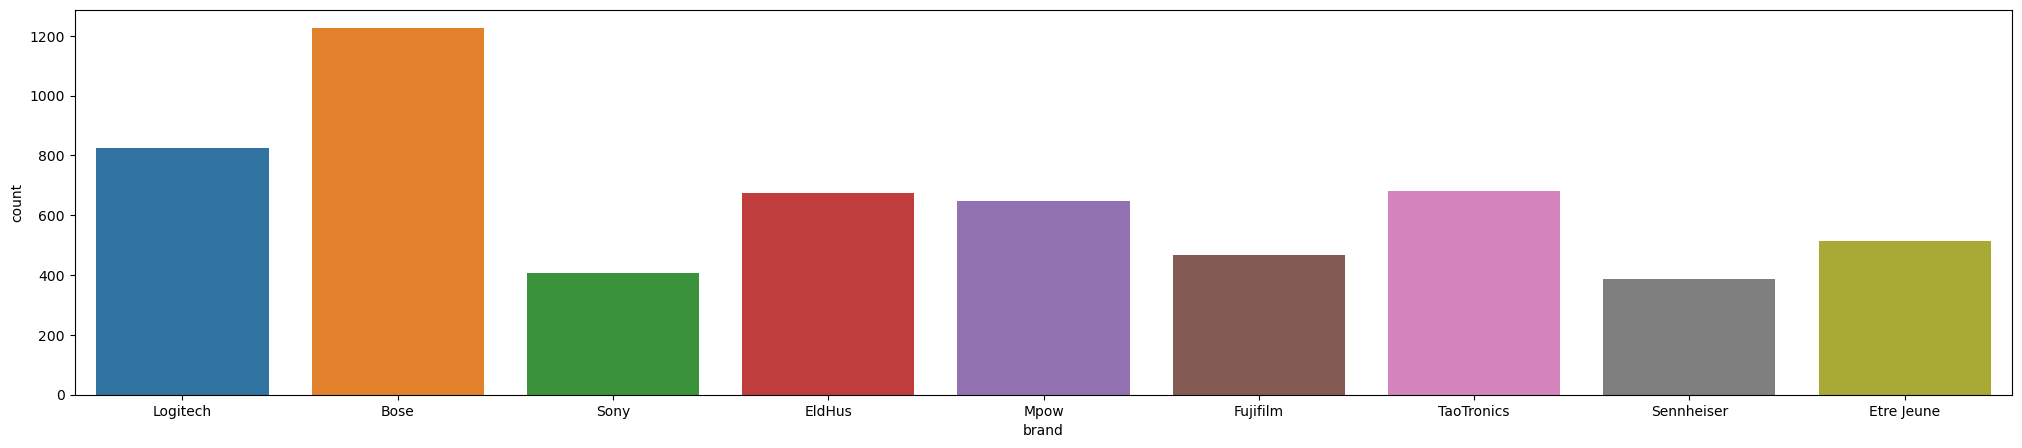

In [52]:
#brands with most sales in 2016
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x = 'brand',data = Dataset[Dataset['year']==2016],order = Dataset['brand'].value_counts().iloc[1:10].index)
#Bose had most sales followed by logitech and tratronics

<AxesSubplot:xlabel='brand', ylabel='count'>

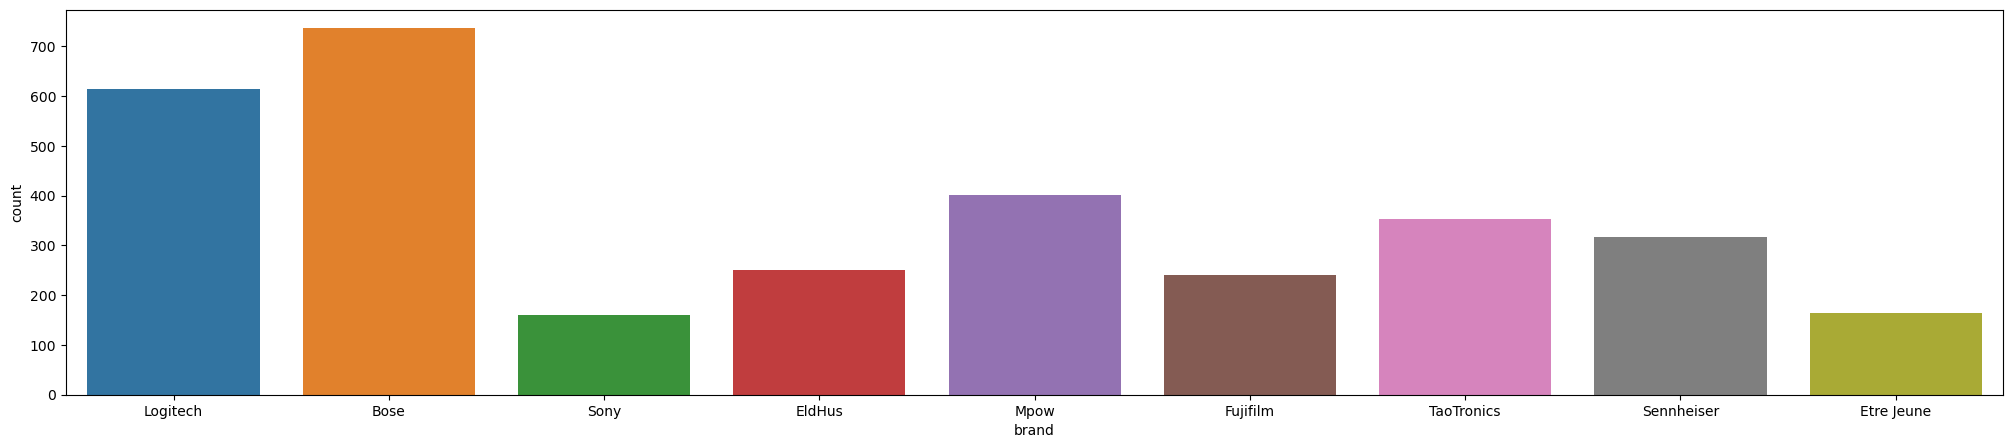

In [53]:
#brands with most sales in 2017
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x = 'brand',data = Dataset[Dataset['year']==2017],order = Dataset['brand'].value_counts().iloc[1:10].index)
#Bose had most sales followed by logitech and mpow

<AxesSubplot:xlabel='brand', ylabel='count'>

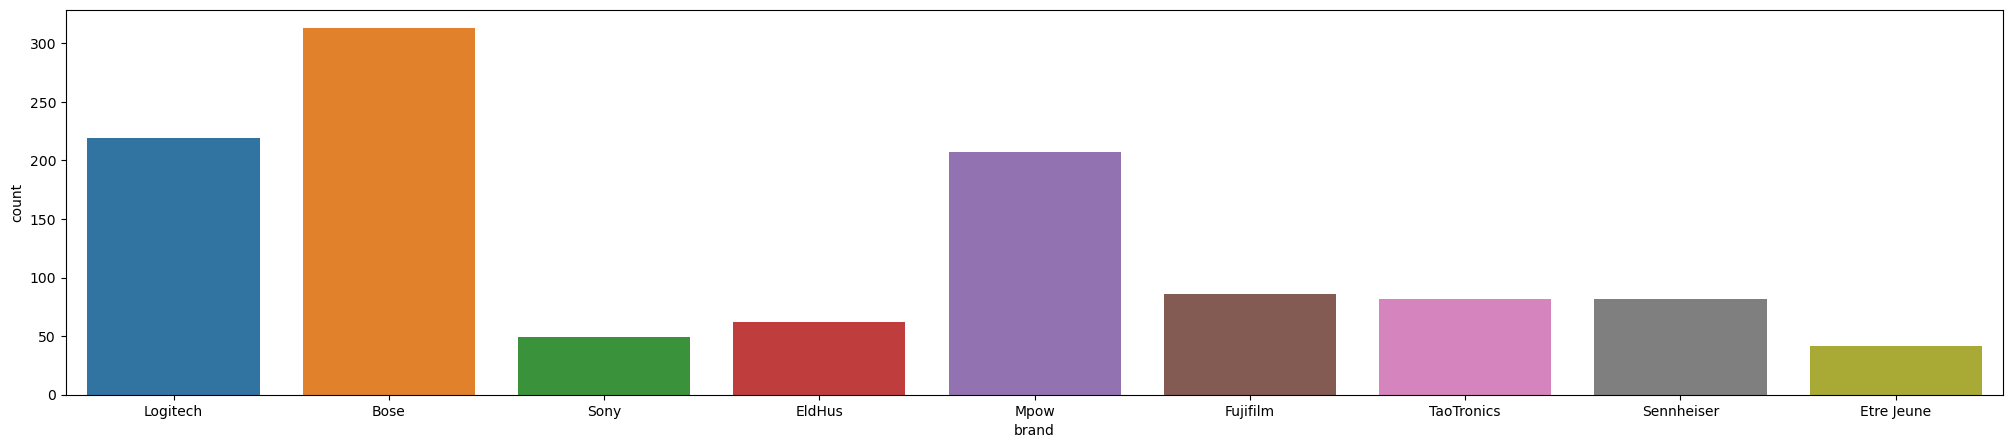

In [54]:
#brands with most sales in 2018
fig, ax = plt.subplots(figsize=(25,5))
sns.countplot(x = 'brand',data = Dataset[Dataset['year']==2018],order = Dataset['brand'].value_counts().iloc[1:10].index)
#Bose had most sales followed by logitech and mpow

<AxesSubplot:xlabel='month', ylabel='count'>

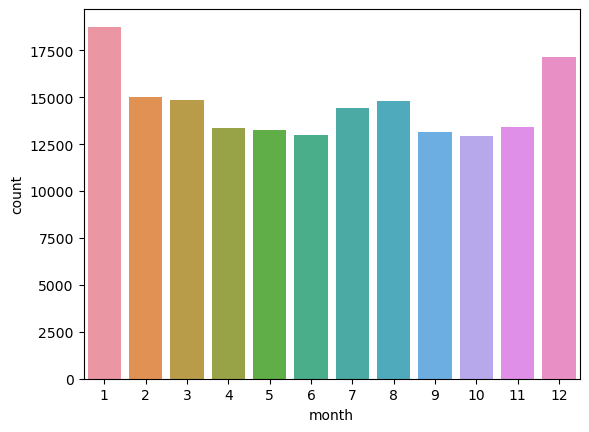

In [55]:
#month with most sales
sns.countplot(x = "month",data = Dataset)
#january

<AxesSubplot:xlabel='category', ylabel='count'>

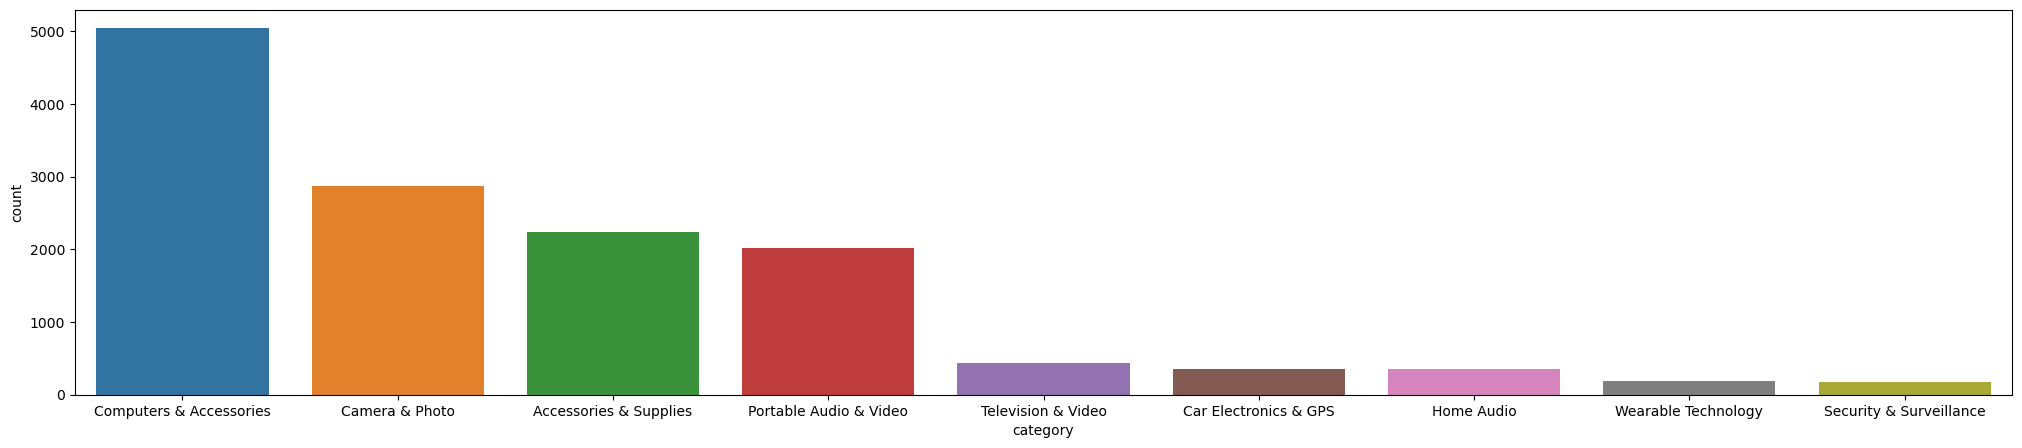

In [60]:
#what category was most sold in jan
fig,ax = plt.subplots(figsize = (25,5))
sns.countplot(x= 'category' , data = Dataset[Dataset['month']==1],order = Dataset['category'].value_counts().iloc[1:10].index)
#top 3 products sold were computer and accesories,Camera and photo,Accessories and supplies

<AxesSubplot:xlabel='category', ylabel='count'>

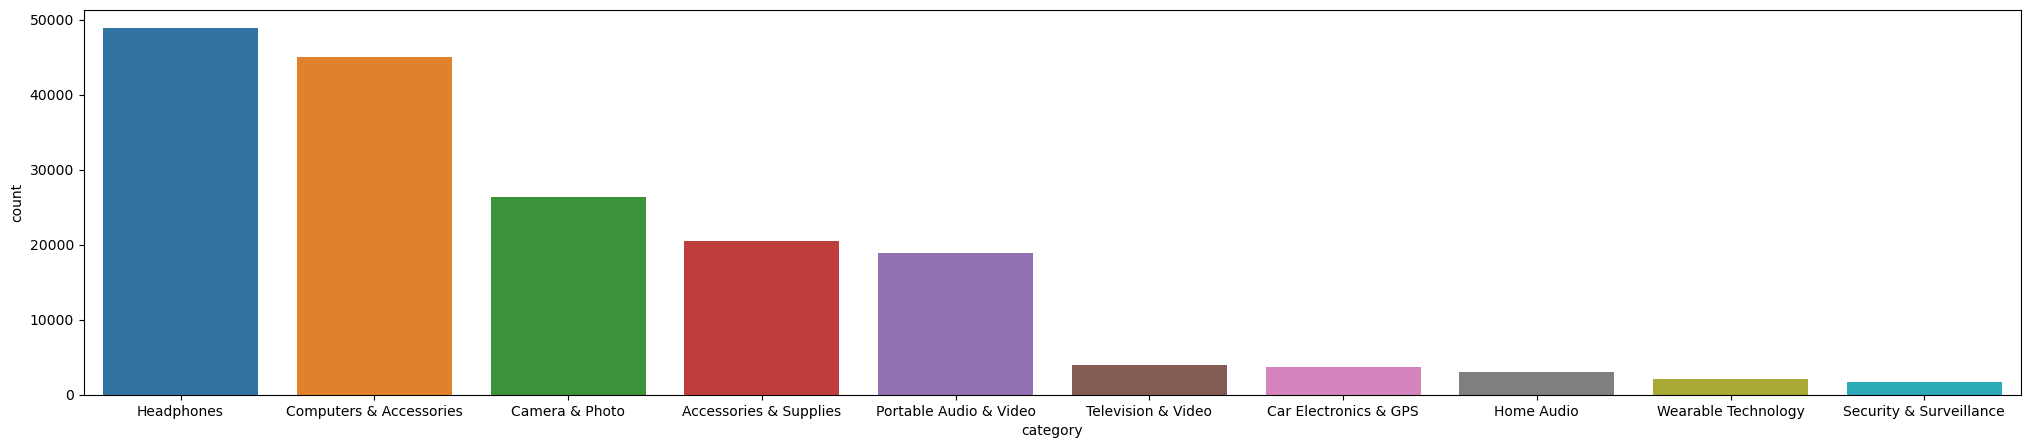

In [62]:
#categories with least sales
fig,ax = plt.subplots(figsize = (25,5))
sns.countplot(x= 'category' , data = Dataset,order = Dataset['category'].value_counts().iloc[-10:].index)
#least sales security and survelliance while most sales is headphones

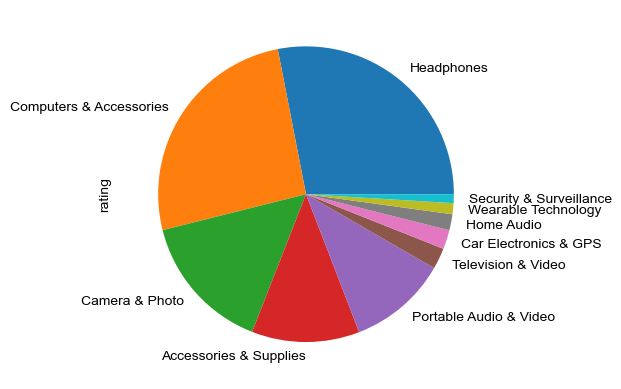

In [70]:
Dataset['category'].value_counts(normalize = True)
Dataset.groupby('category')['rating'].count().sort_values(ascending = False).head(10).plot(kind = 'pie')

sns.set_style("white")

In [71]:
# conclusion of our analysis

# We can see that the year 2015 had the best sales.

# The month of January had the best sales.

# We can see that the brands Bose and Logitech sold the most

# We can see that the category of Headphones sold the most.

# We can see that the brand name of EINCAR sold the least followed closely with DURAGADGET.

# We can see that the category of Security and Surveillance sold the least.